In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

sleeping_patterns = pd.read_csv('sleeping_patterns.csv')
sleeping_patterns.columns = sleeping_patterns.columns.str.replace(' ', '_').str.lower()
print(sleeping_patterns.head(5))

   person_id gender  age            occupation  sleep_duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   quality_of_sleep  physical_activity_level  stress_level bmi_category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  blood_pressure  heart_rate  daily_steps sleep_disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [144]:
#инфа по датасету
end_str = '\n' + '=' * 50 + '\n'

print(sleeping_patterns.info(), end=end_str)

#строки столбцы
print(sleeping_patterns.shape, end=end_str)
#
print(sleeping_patterns['sleep_disorder'].describe(include='all'), end=end_str)
print(sleeping_patterns['sleep_disorder'].describe(), end=end_str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
(374, 13)
count  

In [146]:
#Очистка от дубликатов и пропусков
if sleeping_patterns.duplicated().any():
    print(f'🔁 Найдено {sleeping_patterns.duplicated().sum()} дубликатов.')
    df = sleeping_patterns.drop_duplicates().reset_index(drop=True)
    print('✅ Дубликаты удалены.')
else:
    print('👌 Дубликатов не найдено.')

print(sleeping_patterns.isna().sum())

sleeping_patterns['sleep_disorder'] = sleeping_patterns['sleep_disorder'].fillna('normal')


👌 Дубликатов не найдено.
person_id                  0
gender                     0
age                        0
occupation                 0
sleep_duration             0
quality_of_sleep           0
physical_activity_level    0
stress_level               0
bmi_category               0
blood_pressure             0
heart_rate                 0
daily_steps                0
sleep_disorder             0
dtype: int64


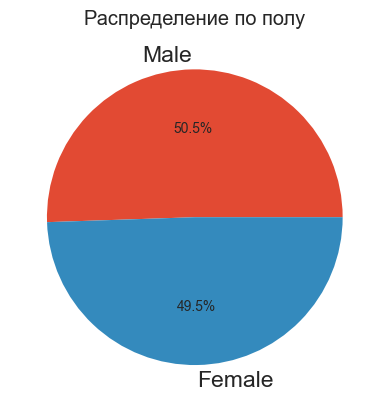

In [148]:
#1 Распределение по полу
gender_series = sleeping_patterns['gender'].value_counts()
plt.figure()
plt.pie(
    gender_series.values,
    labels=gender_series.index,
    autopct='%1.1f%%'  # покажет проценты
)
plt.title('Распределение по полу')
plt.show()


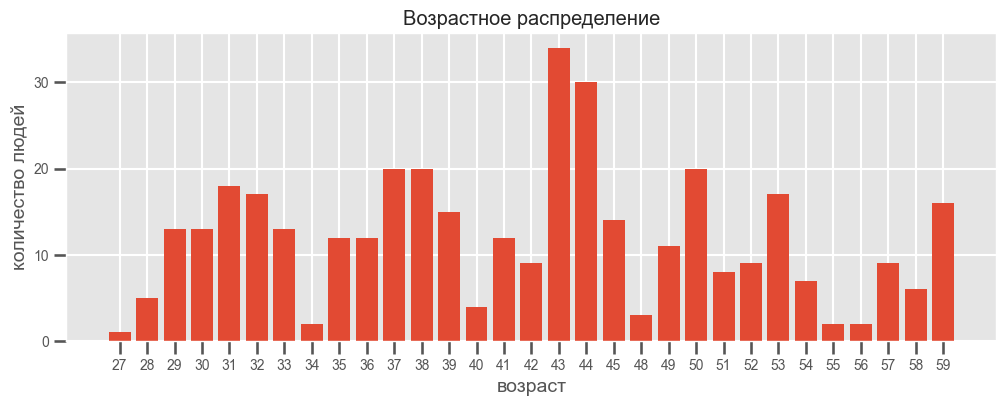

In [149]:
#2 Возрастное распределение
age_series = sleeping_patterns['age'].value_counts()

age_series.sort_index(inplace=True)
plt.figure(figsize=(12, 4))
plt.bar(age_series.index.astype(str), age_series.values)
plt.title('Возрастное распределение')
plt.xlabel('возраст', fontsize=14)
plt.ylabel('количество людей', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [112]:
#получаем список людей с расстройством сна - уже неактуально - заменил за normal
problems_sleep_table = pd.crosstab(
    sleeping_patterns['occupation'],
    sleeping_patterns['sleep_disorder']
)
problems_sleep_table_perc = pd.crosstab(
    sleeping_patterns['occupation'],
    sleeping_patterns['sleep_disorder'],
    normalize='index'
) * 100

# print(problems_sleep_table, end=end_str)
# print(problems_sleep_table_perc, end=end_str)

sleep_disorder        Insomnia  Sleep Apnea  normal
occupation                                         
Accountant                   7            0      30
Doctor                       3            4      64
Engineer                     5            1      57
Lawyer                       2            3      42
Manager                      0            0       1
Nurse                        3           61       9
Sales Representative         0            2       0
Salesperson                 29            1       2
Scientist                    0            2       2
Software Engineer            1            0       3
Teacher                     27            4       9
sleep_disorder         Insomnia  Sleep Apnea      normal
occupation                                              
Accountant            18.918919     0.000000   81.081081
Doctor                 4.225352     5.633803   90.140845
Engineer               7.936508     1.587302   90.476190
Lawyer                 4.255319     6.3

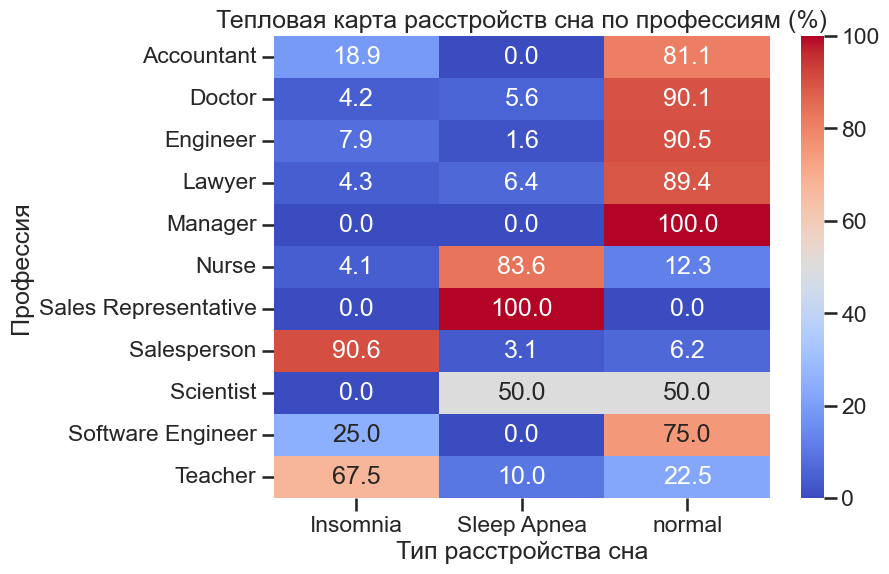

In [113]:
#Выводим таблицу в хотмапе
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
sns.set_context('talk')

plt.figure(figsize=(8, 6))
sns.heatmap(
    problems_sleep_table_perc,
    annot=True,
    fmt='.1f',
    cmap='coolwarm'
)

plt.title('Тепловая карта расстройств сна по профессиям (%)')
plt.xlabel('Тип расстройства сна')
plt.ylabel('Профессия')
plt.show()
